In [56]:
###capstone BUSINESS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import dill

In [2]:

with open('df_compact_clean.pkd', 'rb') as f:
    df_compact = dill.load(f)

In [3]:
df_compact.describe()

,Price
count,204160.000000
mean,982.653684
std,545.169581
min,1.090000
25%,599.000000
50%,846.825000
75%,1311.502500
max,19999.000000


In [4]:
df_compact.head()

,ASIN,Date,Price
0,B00TCBVHSM,2015/07/27,249.0
1,B00TCBVHSM,2015/07/28,269.0
2,B00TCBVHSM,2015/07/30,NaN
3,B00TCBVHSM,2015/08/05,269.0
4,B00TCBVHSM,2015/08/17,250.0


In [5]:
df_compact.tail()

,ASIN,Date,Price
214740,B0BL3NY1YX,2022/11/29,556.93
214741,B0BL3NY1YX,2022/11/29,557.18
214742,B0BL3NY1YX,2022/12/01,557.34
214743,B0BL3NY1YX,2022/12/01,556.81
214744,B0BL3NY1YX,2022/12/01,556.74


In [6]:
df_compact.shape

(214745, 3)

In [7]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214745 entries, 0 to 214744
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ASIN    214745 non-null  object 
 1   Date    214745 non-null  object 
 2   Price   204160 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.9+ MB


In [8]:
df_compact.isnull().sum()

ASIN         0
Date         0
Price    10585
dtype: int64

In [9]:
df_compact.dropna(inplace=True)

In [10]:
df_compact

,ASIN,Date,Price
0,B00TCBVHSM,2015/07/27,249.00
1,B00TCBVHSM,2015/07/28,269.00
3,B00TCBVHSM,2015/08/05,269.00
4,B00TCBVHSM,2015/08/17,250.00
5,B00TCBVHSM,2015/08/17,269.00
...,...,...,...
214740,B0BL3NY1YX,2022/11/29,556.93
214741,B0BL3NY1YX,2022/11/29,557.18
214742,B0BL3NY1YX,2022/12/01,557.34
214743,B0BL3NY1YX,2022/12/01,556.81


In [11]:
df_compact.reset_index(inplace=True)

In [12]:
df_compact

,index,ASIN,Date,Price
0,0,B00TCBVHSM,2015/07/27,249.00
1,1,B00TCBVHSM,2015/07/28,269.00
2,3,B00TCBVHSM,2015/08/05,269.00
3,4,B00TCBVHSM,2015/08/17,250.00
4,5,B00TCBVHSM,2015/08/17,269.00
...,...,...,...,...
204155,214740,B0BL3NY1YX,2022/11/29,556.93
204156,214741,B0BL3NY1YX,2022/11/29,557.18
204157,214742,B0BL3NY1YX,2022/12/01,557.34
204158,214743,B0BL3NY1YX,2022/12/01,556.81


In [13]:
len(pd.unique(df_compact['ASIN']))

1609

In [14]:
ASIN = df_compact['ASIN'].unique()

In [15]:
ASIN

array(['B00TCBVHSM', 'B00U30Q9R0', 'B00V0YJM8Q', ..., 'B0BJQ1BH2R',
       'B0BJQ2YZSX', 'B0BL3NY1YX'], dtype=object)

In [16]:
df_compact.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

Price                                                     
           count         mean    median         std      min      max
ASIN                                                                 
B00TCBVHSM    96   296.477917   299.000   34.510819   219.00   355.55
B00U30Q9R0    58   816.630862   836.190   79.037216   432.00   867.99
B00V0YJM8Q   134  1398.182388  1298.880  268.998380   690.00  2493.00
B00X5X2NXQ   673   266.035230   263.050   30.286500   168.49   521.26
B00XQXO0KE    29   621.877931   639.990  161.610119     3.99   899.99
...          ...          ...       ...         ...      ...      ...
B0BJ35RHL3    12   389.424167   385.205   15.314606   371.56   426.79
B0BJH9LGK8    22   673.671818   684.475   18.213729   624.65   689.99
B0BJQ1BH2R     9  1103.403333  1105.240    4.976070  1093.99  1107.99
B0BJQ2YZSX     8  1153.990000  1154.990    4.208834  1145.99  1157.99
B0BL3NY1YX    26   559.908077   557.000   13.064844   542.05   603.18

[1609 rows x 6 columns]

In [17]:
df_abstract = df_compact.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

In [18]:
df_compact['Date'] = pd.to_datetime(df_compact['Date'])

In [19]:
df_compact.drop('index', axis=1, inplace=True)

In [20]:
df_compact

,ASIN,Date,Price
0,B00TCBVHSM,2015-07-27,249.00
1,B00TCBVHSM,2015-07-28,269.00
2,B00TCBVHSM,2015-08-05,269.00
3,B00TCBVHSM,2015-08-17,250.00
4,B00TCBVHSM,2015-08-17,269.00
...,...,...,...
204155,B0BL3NY1YX,2022-11-29,556.93
204156,B0BL3NY1YX,2022-11-29,557.18
204157,B0BL3NY1YX,2022-12-01,557.34
204158,B0BL3NY1YX,2022-12-01,556.81


In [21]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204160 entries, 0 to 204159
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ASIN    204160 non-null  object        
 1   Date    204160 non-null  datetime64[ns]
 2   Price   204160 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.7+ MB


In [22]:
df_compact.groupby(['ASIN']).agg({'Date': ['count',  'min', 'max'] })

Date                      
           count        min        max
ASIN                                  
B00TCBVHSM    96 2015-07-27 2020-09-03
B00U30Q9R0    58 2018-10-19 2022-08-20
B00V0YJM8Q   134 2015-08-06 2020-09-03
B00X5X2NXQ   673 2015-11-23 2022-01-01
B00XQXO0KE    29 2015-06-01 2022-11-29
...          ...        ...        ...
B0BJ35RHL3    12 2022-10-17 2022-11-28
B0BJH9LGK8    22 2022-10-24 2022-12-01
B0BJQ1BH2R     9 2022-10-20 2022-11-29
B0BJQ2YZSX     8 2022-10-20 2022-11-29
B0BL3NY1YX    26 2022-11-01 2022-12-01

[1609 rows x 3 columns]

In [23]:
def date_time_features(df):
    """
    time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.Date.dt.dayofweek
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [24]:
df1= date_time_features(df_compact)
df1

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,B00TCBVHSM,2015-07-27,249.00,0,3,7,2015,208,27,31,2
1,B00TCBVHSM,2015-07-28,269.00,1,3,7,2015,209,28,31,2
2,B00TCBVHSM,2015-08-05,269.00,2,3,8,2015,217,5,32,2
3,B00TCBVHSM,2015-08-17,250.00,0,3,8,2015,229,17,34,2
4,B00TCBVHSM,2015-08-17,269.00,0,3,8,2015,229,17,34,2
...,...,...,...,...,...,...,...,...,...,...,...
204155,B0BL3NY1YX,2022-11-29,556.93,1,4,11,2022,333,29,48,3
204156,B0BL3NY1YX,2022-11-29,557.18,1,4,11,2022,333,29,48,3
204157,B0BL3NY1YX,2022-12-01,557.34,3,4,12,2022,335,1,48,0
204158,B0BL3NY1YX,2022-12-01,556.81,3,4,12,2022,335,1,48,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204160 entries, 0 to 204159
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ASIN        204160 non-null  object        
 1   Date        204160 non-null  datetime64[ns]
 2   Price       204160 non-null  float64       
 3   dayofweek   204160 non-null  int64         
 4   quarter     204160 non-null  int64         
 5   month       204160 non-null  int64         
 6   year        204160 non-null  int64         
 7   dayofyear   204160 non-null  int64         
 8   dayofmonth  204160 non-null  int64         
 9   weekofyear  204160 non-null  int64         
 10  season      204160 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 16.4+ MB


In [82]:
## Lag features and window features

In [83]:
# ### Because they are based on the idea that the past might impact the present or even hold some sort of inherent knowledge 
# about the future, lag features are values at earlier timesteps that are deemed valuable. 
# For instance, if you want to forecast comparable price the next week, it can be helpful to generate characteristics 
# for price that occurred the prior week 

In [26]:
def lag_features(df, lags):
    for lag in lags:
        df['price_lag_' + str(lag)] = df.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag))
    return df

In [85]:
# Our main goal is to identify the trend, seasonality, and level. 
# This time period has been added in increments of three months, such as three months + one week, three months plus two weeks, 
# six months, etc., because it is three months long.

In [27]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
0,B00TCBVHSM,2015-07-27,249.0,0,3,7,2015,208,27,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00TCBVHSM,2015-07-28,269.0,1,3,7,2015,209,28,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00TCBVHSM,2015-08-05,269.0,2,3,8,2015,217,5,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00TCBVHSM,2015-08-17,250.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00TCBVHSM,2015-08-17,269.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Rolling Mean Features
# The moving average feature is derived using the rolling approach. 
# The window argument also conveys the number of steps remaining. Past 2-3-5 numbers, on average, etc.

# When employing the rolling approach, it takes into account all past averages, 
# including itself. This is a problem. Therefore, after receiving a delay, we must produce the moving average feature.

In [28]:
def roll_mean_features(df, windows):
    for window in windows:
        df['price_roll_mean_' + str(window)] = df.groupby(["ASIN"])['Price']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [90]:
# to reflect information about 1 and 1.5 years ago in the data:

In [29]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
0,B00TCBVHSM,2015-07-27,249.0,0,3,7,2015,208,27,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00TCBVHSM,2015-07-28,269.0,1,3,7,2015,209,28,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00TCBVHSM,2015-08-05,269.0,2,3,8,2015,217,5,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00TCBVHSM,2015-08-17,250.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00TCBVHSM,2015-08-17,269.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
204155,B0BL3NY1YX,2022-11-29,556.93,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.883593,565.087551
204156,B0BL3NY1YX,2022-11-29,557.18,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.496640,564.681322
204157,B0BL3NY1YX,2022-12-01,557.34,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,564.146268,564.313837
204158,B0BL3NY1YX,2022-12-01,556.81,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563.828100,563.980556
204159,B0BL3NY1YX,2022-12-01,556.74,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563.536308,563.676368


In [93]:
# Exponentially Weighted Mean Features
# design features whose values of exponential moving average match to various alpha values.

In [31]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [32]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
0,B00TCBVHSM,2015-07-27,249.0,0,3,7,2015,208,27,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00TCBVHSM,2015-07-28,269.0,1,3,7,2015,209,28,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00TCBVHSM,2015-08-05,269.0,2,3,8,2015,217,5,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00TCBVHSM,2015-08-17,250.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00TCBVHSM,2015-08-17,269.0,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
204155,B0BL3NY1YX,2022-11-29,556.93,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204156,B0BL3NY1YX,2022-11-29,557.18,1,4,11,2022,333,29,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204157,B0BL3NY1YX,2022-12-01,557.34,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204158,B0BL3NY1YX,2022-12-01,556.81,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204159,B0BL3NY1YX,2022-12-01,556.74,3,4,12,2022,335,1,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df1.shape

(204160, 68)

In [105]:
# One-Hot-Encoding

In [35]:
df2 = pd.get_dummies(df1, columns=[ 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(204160, 98)

In [36]:
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00TCBVHSM,2015-07-27,249.0,208,27,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00TCBVHSM,2015-07-28,269.0,209,28,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00TCBVHSM,2015-08-05,269.0,217,5,32,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00TCBVHSM,2015-08-17,250.0,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00TCBVHSM,2015-08-17,269.0,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [108]:
###Logarithmic Transformation for Sales data

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

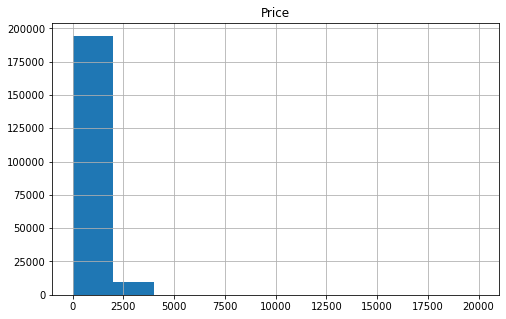

In [37]:
df2.hist('Price',figsize=(8,5))

In [38]:
df2['Price']= np.log1p(df2["Price"].values)
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00TCBVHSM,2015-07-27,5.521461,208,27,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00TCBVHSM,2015-07-28,5.598422,209,28,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00TCBVHSM,2015-08-05,5.598422,217,5,32,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00TCBVHSM,2015-08-17,5.525453,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00TCBVHSM,2015-08-17,5.598422,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

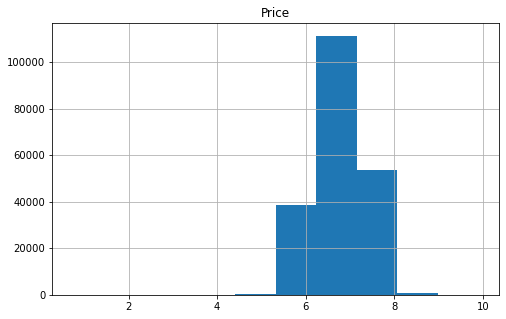

In [39]:
df2.hist('Price',figsize=(8,5))

In [112]:
# Splitting Train and Test

In [40]:
df_model= df2.copy()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train, val = train_test_split(df_model, test_size=0.2, random_state=None, shuffle=False)

In [43]:
train

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00TCBVHSM,2015-07-27,5.521461,208,27,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00TCBVHSM,2015-07-28,5.598422,209,28,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00TCBVHSM,2015-08-05,5.598422,217,5,32,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00TCBVHSM,2015-08-17,5.525453,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00TCBVHSM,2015-08-17,5.598422,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163323,B08ZJCPSNC,2021-09-09,7.560919,252,9,36,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163324,B08ZJCPSNC,2021-09-10,7.561637,253,10,36,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163325,B08ZJCPSNC,2021-09-10,7.644915,253,10,36,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163326,B08ZJCPSNC,2021-09-11,7.669491,254,11,36,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1


In [44]:
val

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
163328,B08ZJCPSNC,2021-09-14,7.669491,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163329,B08ZJCPSNC,2021-09-14,7.376377,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163330,B08ZJCPSNC,2021-09-16,7.377384,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163331,B08ZJCPSNC,2021-09-16,7.377390,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163332,B08ZJCPSNC,2021-09-16,7.372382,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204155,B0BL3NY1YX,2022-11-29,6.324234,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204156,B0BL3NY1YX,2022-11-29,6.324681,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204157,B0BL3NY1YX,2022-12-01,6.324968,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
204158,B0BL3NY1YX,2022-12-01,6.324018,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0


In [45]:
cols = [col for col in train.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [46]:
X_train = train[cols]
Y_train = train['Price']

X_val = val[cols]
Y_val = val['Price']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((163328, 95), (163328,), (40832, 95), (40832,))

In [136]:
###Building and Running XGB Regressor

In [47]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [48]:
import xgboost as xgb

In [49]:
model= xgb.XGBRegressor()

In [50]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# To assess the variation between predictions and actual data, 
# the SMAPE (Symmetric mean absolute percentage error (adjusted MAPE)) metric.

In [51]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

C:\Users\EVA\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


VALID SMAPE: 15.534179945924594
	Explained variance: 0.772286344119524
	Mean absolute error (MAE): 0.15910114804627873
	Root Mean squared error (RMSE): 0.2657418710295553
	R2 score: 0.7707228111517396
Wall time: 17.7 s


In [66]:
# Feature importances

# Which features are the most important in the regression calculation?

In [52]:
feature_importance= pd.DataFrame(data   = first_model.feature_importances_,
                 index  = first_model.feature_names_in_,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

,importance
price_roll_mean_365,0.611979
price_roll_mean_546,0.067676
price_ewm_alpha_08_lag_91,0.013834
year_2020,0.010367
price_ewm_alpha_09_lag_91,0.008670
year_2021,0.008664
month_3,0.008638
year_2022,0.007813
price_ewm_alpha_095_lag_91,0.007746
price_ewm_alpha_07_lag_728,0.006341


In [ ]:
# Test Data Predictions

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df_final_model= df2.copy()

In [55]:
train, test = train_test_split(df_final_model, test_size=0.2, random_state=None, shuffle=False)

In [56]:
train.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00TCBVHSM,2015-07-27,5.521461,208,27,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00TCBVHSM,2015-07-28,5.598422,209,28,31,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00TCBVHSM,2015-08-05,5.598422,217,5,32,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00TCBVHSM,2015-08-17,5.525453,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00TCBVHSM,2015-08-17,5.598422,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [57]:
Y_train = train['Price']

In [58]:
Y_train

0         5.521461
1         5.598422
2         5.598422
3         5.525453
4         5.598422
            ...   
163323    7.560919
163324    7.561637
163325    7.644915
163326    7.669491
163327    7.614781
Name: Price, Length: 163328, dtype: float64

In [59]:
X_train = train[cols]

In [60]:
X_train.head()

,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,208,27,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,209,28,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,217,5,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,229,17,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,229,17,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [61]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
163328,B08ZJCPSNC,2021-09-14,7.669491,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163329,B08ZJCPSNC,2021-09-14,7.376377,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163330,B08ZJCPSNC,2021-09-16,7.377384,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163331,B08ZJCPSNC,2021-09-16,7.377390,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163332,B08ZJCPSNC,2021-09-16,7.372382,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204155,B0BL3NY1YX,2022-11-29,6.324234,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204156,B0BL3NY1YX,2022-11-29,6.324681,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204157,B0BL3NY1YX,2022-12-01,6.324968,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
204158,B0BL3NY1YX,2022-12-01,6.324018,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0


In [62]:
X_test = test[cols]

In [63]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [64]:
start = time()
xgb_params= {"colsample_bytree": 0.3, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

[11:11:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "num_boost_round", "verbose" } are not used.



In [65]:
test_preds

array([7.413194 , 7.413194 , 7.413194 , ..., 6.2815757, 6.2815757,
       6.2815757], dtype=float32)

In [66]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
163328,B08ZJCPSNC,2021-09-14,7.669491,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163329,B08ZJCPSNC,2021-09-14,7.376377,257,14,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163330,B08ZJCPSNC,2021-09-16,7.377384,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163331,B08ZJCPSNC,2021-09-16,7.377390,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
163332,B08ZJCPSNC,2021-09-16,7.372382,259,16,37,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204155,B0BL3NY1YX,2022-11-29,6.324234,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204156,B0BL3NY1YX,2022-11-29,6.324681,333,29,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
204157,B0BL3NY1YX,2022-12-01,6.324968,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
204158,B0BL3NY1YX,2022-12-01,6.324018,335,1,48,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0


In [67]:
submission_df = test.loc[:, ['ASIN', 'Price']]
submission_df['Price'] = np.expm1(test_preds)
submission_df['ASIN'] = submission_df.ASIN
submission_df.head(10)

,ASIN,Price
163328,B08ZJCPSNC,1656.712891
163329,B08ZJCPSNC,1656.712891
163330,B08ZJCPSNC,1656.712891
163331,B08ZJCPSNC,1656.712891
163332,B08ZJCPSNC,1656.712891
163333,B08ZJCPSNC,1656.712891
163334,B08ZJCPSNC,1656.712891
163335,B08ZJCPSNC,1656.712891
163336,B08ZJCPSNC,1656.712891
163337,B08ZJCPSNC,1649.239380


In [68]:
submission_df.tail(10)

,ASIN,Price
204150,B0BL3NY1YX,538.324585
204151,B0BL3NY1YX,538.324585
204152,B0BL3NY1YX,538.324585
204153,B0BL3NY1YX,538.324585
204154,B0BL3NY1YX,538.324585
204155,B0BL3NY1YX,538.324585
204156,B0BL3NY1YX,538.324585
204157,B0BL3NY1YX,533.630432
204158,B0BL3NY1YX,533.630432
204159,B0BL3NY1YX,533.630432


In [69]:
df1[df1['ASIN'] == 'B08ZJCPSNC'] [['Price', 'Date']]

,Price,Date
163293,2643.68,2021-06-10
163294,2664.47,2021-06-12
163295,1799.99,2021-06-23
163296,2664.47,2021-07-02
163297,1799.99,2021-07-04
...,...,...
163522,1195.00,2022-09-29
163523,1167.52,2022-10-29
163524,992.39,2022-10-31
163525,886.63,2022-11-02


In [70]:
df1[df1['ASIN'] == 'B0BL3NY1YX'] [['Price', 'Date']]

,Price,Date
204134,603.18,2022-11-01
204135,603.13,2022-11-02
204136,557.34,2022-11-02
204137,557.29,2022-11-02
204138,557.34,2022-11-08
204139,557.29,2022-11-08
204140,557.00,2022-11-10
204141,556.93,2022-11-11
204142,556.82,2022-11-12
204143,557.25,2022-11-15
